In [1]:
import utility_common as common
from misid_dftemplater import *

# 1. Make templates

In [2]:
variation = ''
tp = DFTemplater(variation)
xShp,xCnt,yShp,yCnt = tp.makeTemplatesAndTargets()

In [3]:
baseDir = common.getBaseDirectory()

np.save(baseDir + "data/misidtemplates/shaping/X_{}".format(variation),xShp)
np.save(baseDir + "data/misidtemplates/counting/X_{}".format(variation),xCnt)
if variation == '':
    np.save(baseDir + "data/misidtemplates/shaping/Y_{}".format(variation),yShp)
    np.save(baseDir + "data/misidtemplates/counting/Y_{}".format(variation),yCnt)

# 2. Plot Templates

In [4]:
baseDir = common.getBaseDirectory()
X = np.load(baseDir + "data/misidtemplates/shaping/X_.npy")
Y = np.load(baseDir + "data/misidtemplates/shaping/Y_.npy")

In [5]:
temp = np.concatenate(X,axis=1)
targ = np.concatenate(Y,axis=0)
# separate processes
mctt = np.sum(temp[0:4],axis=0)
mct  = np.sum(temp[4:8],axis=0)
mcw  = np.sum(temp[8:12],axis=0)
mcz  = np.sum(temp[12:16],axis=0)
mcvv = np.sum(temp[16:20],axis=0)

mclist = [mcvv,mcz,mcw,mct,mctt]

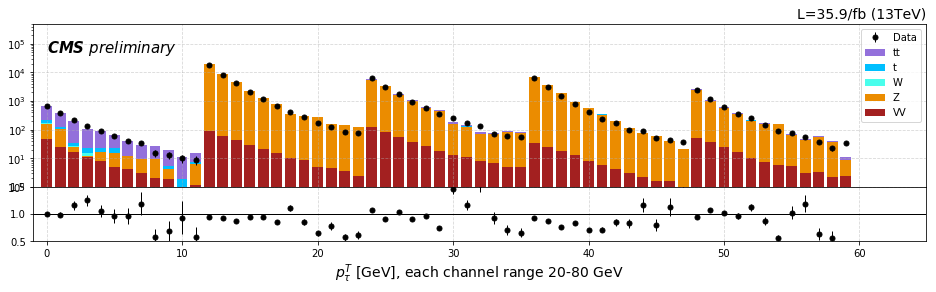

In [15]:
colorList = ["#a32020","#eb8c00","#49feec","deepskyblue","mediumpurple"]
labelList = ["VV","Z","W","t","tt"]
chList = common.channelLsit()


fig, axes = plt.subplots(2, 1, sharex=True, facecolor='w',
                         gridspec_kw={'height_ratios':[3,1]},
                         figsize=(16,4))
fig.subplots_adjust(hspace=0)


c = np.arange(targ.size)
accum = np.zeros(targ.size)

# making plot

ax = axes[0]
for i in range(len(mclist)):
    height = mclist[i]
    ax.bar(c, height, bottom=accum, width=0.8, alpha=1, color=colorList[i],label=labelList[i])
    accum += height
ax.errorbar(c, targ,yerr=targ**0.5, c='k', fmt='.',markersize=10,lw=1, label='Data')
ax.grid(True,linestyle="--",alpha=0.5)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])
ax.set_yscale('log')
ax.set_ylim(1,5e5)
ax.text(0, 5e4, r'CMS $preliminary$',style="italic",fontsize="15",fontweight='bold')
ax.set_title("L=35.9/fb (13TeV)",loc="right",fontsize=14)

ax = axes[1]
ax.errorbar(c, targ/accum, yerr=targ**0.5/accum, c='k', fmt='.',markersize=10,lw=1)
ax.grid(True,linestyle="--",alpha=0.5)
ax.axhline(1,lw=1,color='k')
ax.set_ylim(0.5,1.5)
ax.set_xlim(c.min()-1., 1.1*c.max())
ax.set_xlabel(r'$p^T_\tau$ [GeV], each channel range 20-80 GeV',fontsize=14)

plt.savefig('../../plots/tauID',dpi=300)